<a href="https://colab.research.google.com/github/mal258/machinelearning258/blob/master/Invincibles_Web_MD_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Impot libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
import io
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [0]:
#Data set load
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/Training.csv"
file=requests.get(url).content
disease_df=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [40]:
disease_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


In [41]:
disease_df.shape

(4920, 133)

In [42]:
disease_df.isnull().sum().sort_values(ascending=False)

prognosis               0
malaise                 0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
                       ..
internal_itching        0
toxic_look_(typhos)     0
depression              0
irritability            0
itching                 0
Length: 133, dtype: int64

In [43]:
disease_df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [44]:
disease_df['prognosis'].value_counts(normalize = True)

Malaria                                    0.02439
Varicose veins                             0.02439
Drug Reaction                              0.02439
Chronic cholestasis                        0.02439
Dengue                                     0.02439
Jaundice                                   0.02439
Psoriasis                                  0.02439
Arthritis                                  0.02439
Urinary tract infection                    0.02439
Fungal infection                           0.02439
Common Cold                                0.02439
Hypoglycemia                               0.02439
Alcoholic hepatitis                        0.02439
Tuberculosis                               0.02439
Allergy                                    0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Impetigo                                   0.02439
Hepatitis D                                0.02439
Hypertension                               0.02439
Paralysis (brain hemorrhage)   

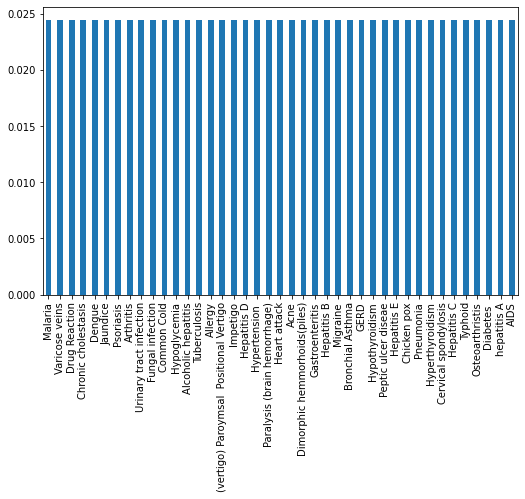

In [45]:
disease_df['prognosis'].value_counts(normalize = True).plot.bar()
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

In [46]:
disease_df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

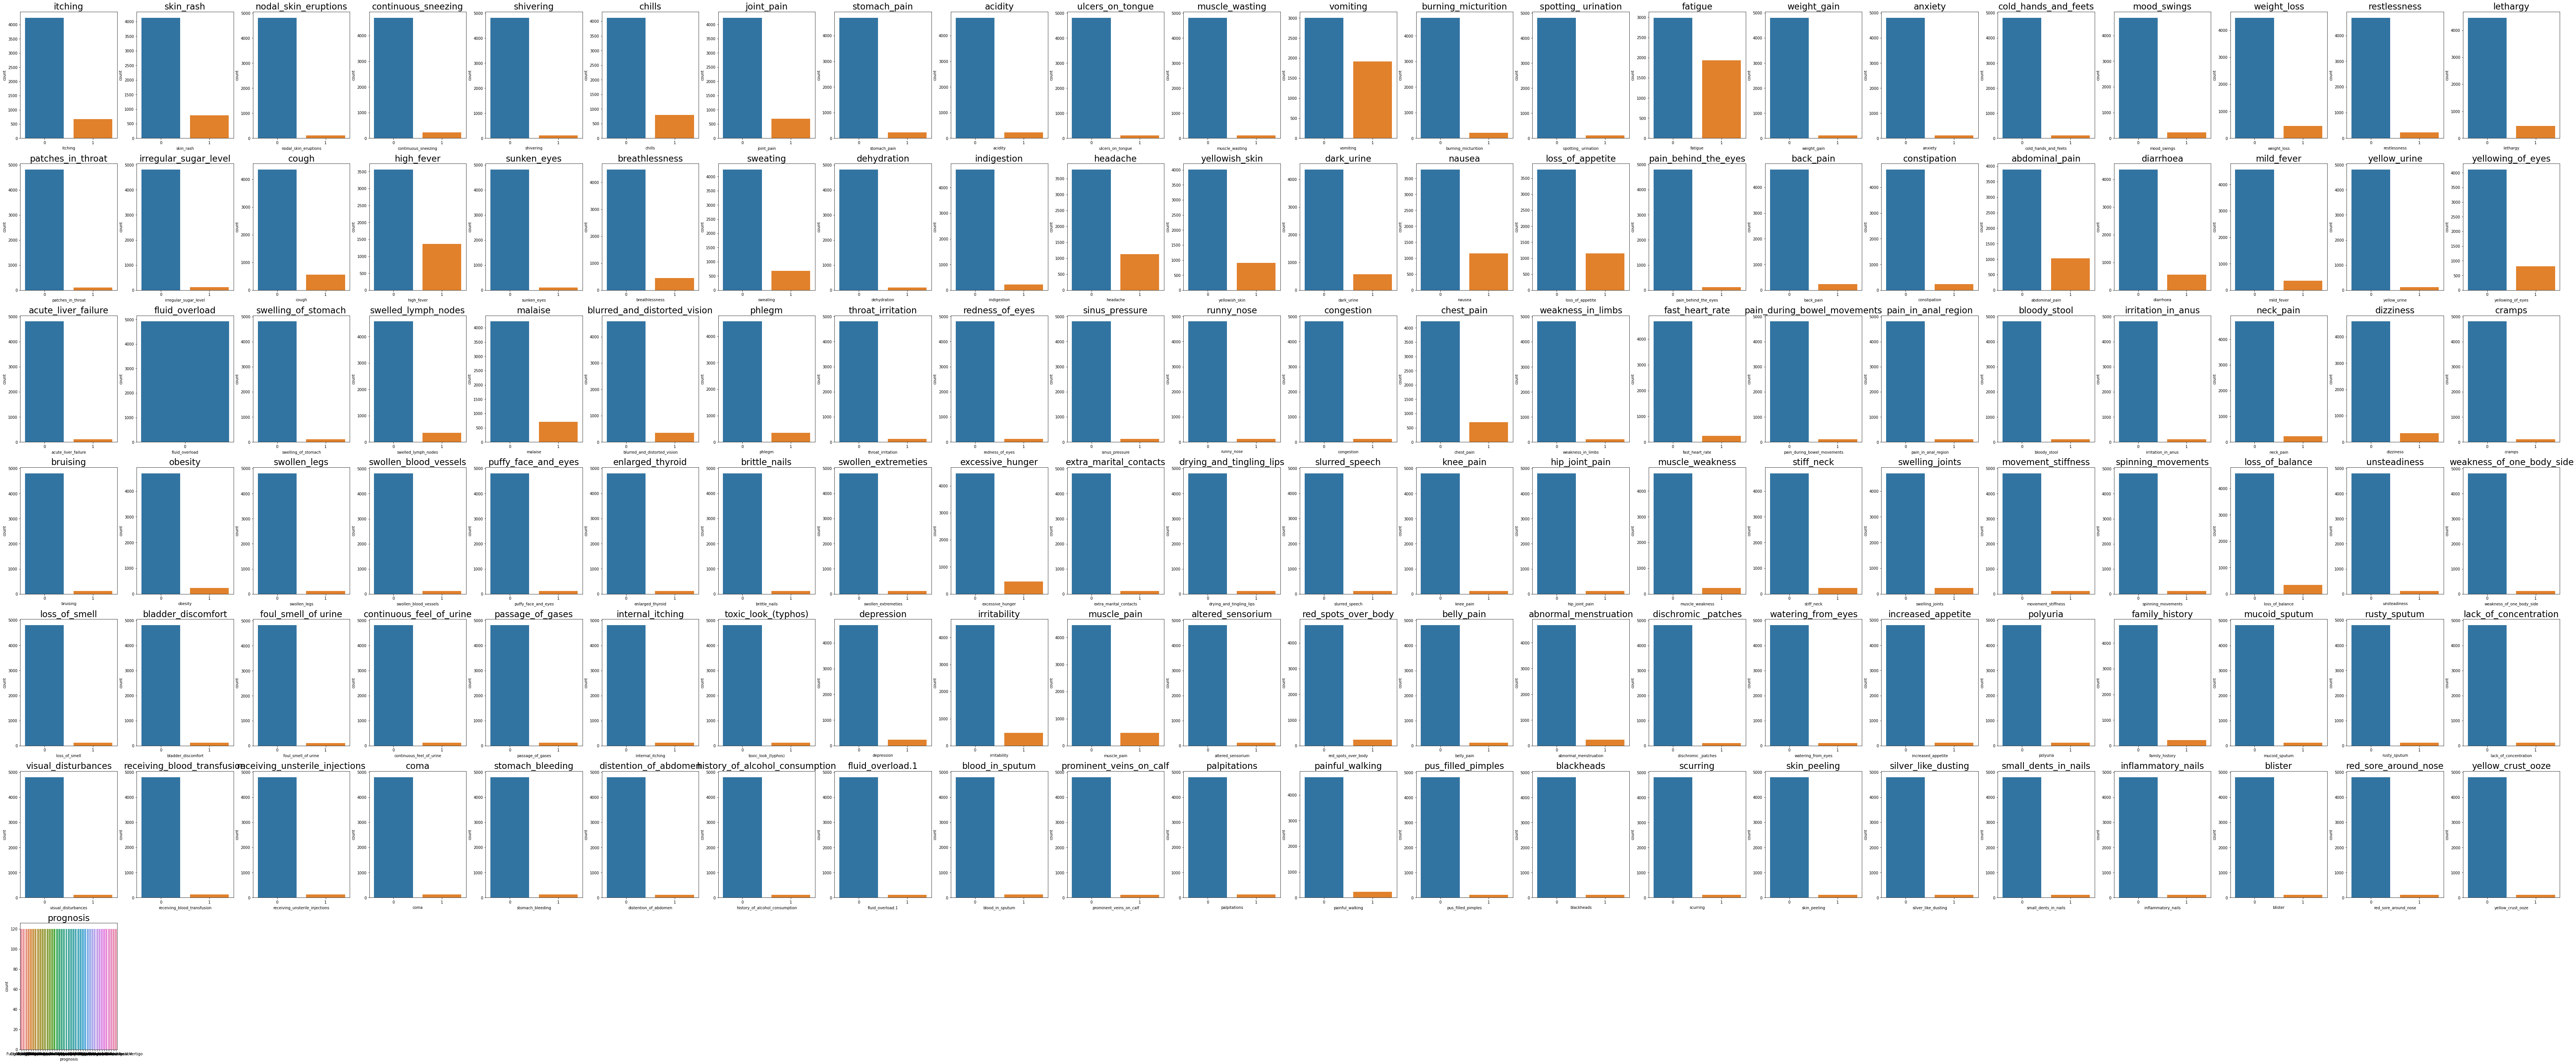

In [47]:
for x in range(disease_df.shape[1]):
    plt.subplot(7,22,x+1)
    plt.subplots_adjust(left = 0.5, right = 16 , top = 10, bottom = 0.5)
    sns.countplot(disease_df[disease_df.columns[x]]).set_title(disease_df.columns[x],fontsize=23)

In [48]:
pd.crosstab(disease_df['cold_hands_and_feets'],disease_df['weight_gain'])

weight_gain,0,1
cold_hands_and_feets,,
0,4800,6
1,6,108


In [0]:
from scipy.stats import chi2_contingency

In [50]:
chi2_contingency(pd.crosstab(disease_df['cold_hands_and_feets'],disease_df['weight_gain']))

(4362.40173527245, 0.0, 1, array([[4.69464146e+03, 1.11358537e+02],
        [1.11358537e+02, 2.64146341e+00]]))

In [0]:
x = disease_df.drop(['prognosis'],axis =1)
y = disease_df['prognosis']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred = mnb.predict(x_test)

In [58]:
accuracy_score(y_pred,y_test)

1.0

In [59]:
from sklearn.model_selection import cross_val_score
disease_scores = cross_val_score(mnb, x_test, y_test, cv=3)
print (disease_scores)
print (disease_scores.mean())

[1. 1. 1.]
1.0


In [0]:
actual_diseases = y_test.values

In [61]:
for i in range(0, len(actual_diseases)):
    if y_pred[i] == actual_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], actual_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], actual_diseases[i]))

Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: AIDS Actual:AIDS
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Hypertension  Actual:Hypertension 
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Arthritis Actual:Arthritis
Pred: Hepatitis B Actual:Hepatitis B
Pred: Migraine Actual:Migraine
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Diabetes  Actual:Diabetes 
Pred: Cervical spondylosis Actual:Cervical spondylosis
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: hepatitis A Actual:hepatitis A
Pred: Hepatitis B Actual:Hepatitis B
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: Allergy Actu

In [0]:
from sklearn.model_selection import KFold

In [0]:
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = disease_df
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ",i)
    return(train_scores,test_scores)  

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)
from sklearn import svm
clf = svm.LinearSVC(C = 1.0, multi_class='crammer_singer')

In [0]:
#algo_dict = {'Logistic':log,'Decsion_Tree':dt,'Random_Forest_Classifier':ran,'Naive_Bayes' : nb,'Support_Vector_Machine':clf }
algo_dict = {'Decsion_Tree':dt,'Support_Vector_Machine':clf }
algo_train_scores={}
algo_test_scores={}

In [66]:
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(disease_df,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

Decsion_Tree
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
Support_Vector_Machine
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'Decsion_Tree': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'Support_Vector_Machine': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'Decsion_Tree': {2: 0.8817073170731707, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'Support_Vector_Machine': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}


In [0]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)

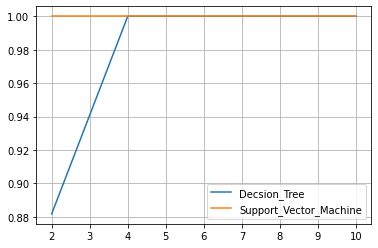

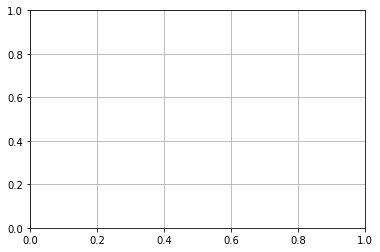

In [68]:
df_test.plot(grid = 1)
plt.show()
plt.grid()

In [69]:
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = disease_df
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = dt.fit(x_train,y_train)
        sum_train += dt.score(x_train,y_train)
        y_pred = dt.predict(x_test)
        #algo_model = ran.fit(x_train,y_train)
        #sum_train += ran.score(x_train,y_train)
        #y_pred = ran.predict(x_test)
        #algo_model = log.fit(x_train,y_train)
        #sum_train += log.score(x_train,y_train)
        #y_pred = log.predict(x_test)
        #algo_model = nb.fit(x_train,y_train)
        #sum_train += nb.score(x_train,y_train)
        #y_pred = nb.predict(x_test)
        #algo_model = clf.fit(x_train,y_train)
        #sum_train += clf.score(x_train,y_train)
        #y_pred = clf.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)  

kvalue:  2


In [70]:
print(train_scores)
print(test_scores)

{2: 1.0}
{2: 0.8804878048780488}


In [71]:

from sklearn.externals import joblib
joblib.dump(dt,'invincibles_web_md_disease_Prediction')

['invincibles_web_md_disease_Prediction']

In [72]:
a = list(range(2,134))
print ("======== Hello from Invinibles Web MD : Enter Details ============ ")
i_name  = (input('Enter your name :'))
i_age = (int(input('Enter your age:')))
for i in range(len(x.columns)):
    print(str(i+1+1) + ":", x.columns[i])
choices = input('Enter the Serial no.s which is your Symptoms are exist:  ')
b = [int(x) for x in choices.split()]
count = 0
while count < len(b):
    item_to_replace =  b[count]
    replacement_value = 1
    indices_to_replace = [i for i,x in enumerate(a) if x==item_to_replace]
    count += 1
    for i in indices_to_replace:
        a[i] = replacement_value
a = [0 if x !=1 else x for x in a]
y_diagnosis = dt.predict([a])
y_pred_2 = dt.predict_proba([a])
print(('Name of the infection = %s , confidence score of : = %s') %(y_diagnosis[0],y_pred_2.max()* 100),'%' )
print(('Name = %s , Age : = %s') %(i_name,i_age))

======== Hello from Invinibles Web MD : Enter Details ============ 
Enter your name :Trump
Enter your age:59
2: itching
3: skin_rash
4: nodal_skin_eruptions
5: continuous_sneezing
6: shivering
7: chills
8: joint_pain
9: stomach_pain
10: acidity
11: ulcers_on_tongue
12: muscle_wasting
13: vomiting
14: burning_micturition
15: spotting_ urination
16: fatigue
17: weight_gain
18: anxiety
19: cold_hands_and_feets
20: mood_swings
21: weight_loss
22: restlessness
23: lethargy
24: patches_in_throat
25: irregular_sugar_level
26: cough
27: high_fever
28: sunken_eyes
29: breathlessness
30: sweating
31: dehydration
32: indigestion
33: headache
34: yellowish_skin
35: dark_urine
36: nausea
37: loss_of_appetite
38: pain_behind_the_eyes
39: back_pain
40: constipation
41: abdominal_pain
42: diarrhoea
43: mild_fever
44: yellow_urine
45: yellowing_of_eyes
46: acute_liver_failure
47: fluid_overload
48: swelling_of_stomach
49: swelled_lymph_nodes
50: malaise
51: blurred_and_distorted_vision
52: phlegm
53: t